# Imports and function definitions

In [1]:
# necessary imports
import nn_module as n
import math
import torch
from torch import Tensor
import matplotlib.pyplot as plt

import sys
if sys.version_info[0] == 3:
    from importlib import reload

In [2]:
def generate_disc_set(nb):
    '''
    Generates the dataset
    parameters:
    nb   : Number of samples to be generated
    returns:
    input, target   : The input data and target label
    '''
    input = Tensor(nb, 2).uniform_(-1, 1)
    target = input.pow(2).sum(1).sub(2 / math.pi).sign().add(1).div(2).view(nb,1)
    return input, target

In [3]:
# generate the datasets (train and test)
train_input, train_target = generate_disc_set(1000)
test_input, test_target = generate_disc_set(1000)

In [4]:
%%capture
# normalize the inputs
mean, std = train_input.mean(), train_input.std()
train_input.sub_(mean).div_(std)
test_input.sub_(mean).div_(std)

# create class labels (2 dimensional output)
train_target = torch.cat((train_target, 1-train_target), dim=1)
test_target = torch.cat((test_target, 1-test_target), dim=1)

In [5]:
def plot_result(points, labels, title = None, ax = plt):
    '''
    plot the points with their labels
    '''
    labels = labels.view(-1,1)
    # use labels==labels+1 to create zero bytes
    mask1x = torch.cat((labels==1, labels==labels+1), 1)
    mask1y = torch.cat((labels==labels+1, labels==1), 1)
    mask0x = torch.cat((labels==0, labels==labels+1), 1)
    mask0y = torch.cat((labels==labels+1, labels==0), 1)
    ax.scatter(points[mask1x], points[mask1y], label = '1')
    ax.scatter(points[mask0x], points[mask0y], label = '0')
    ax.legend()
    if ax==plt:
        plt.title(title, {'fontsize':25})
    else:
        ax.set_title(title, fontsize = 25)


In [6]:
def errors(test_net, train_input, test_input, train_target, test_target):
    pred_train = torch.argmax(test_net.forward(train_input), dim = 1)
    pred_test = torch.argmax(test_net.forward(test_input), dim = 1)
    nbr_errors_train = 0
    nbr_errors_test = 0
    for i in range(1000):
        if pred_train[i].int() != train_target[i,1].int(): nbr_errors_train += 1
        if pred_test[i].int() != test_target[i,1].int(): nbr_errors_test += 1
    print('Final training error: {}%'.format(nbr_errors_train/10))
    print('Final test error: {}%'.format(nbr_errors_test/10))
    
    train_loss = lossf.loss(test_net.forward(train_input), train_target).item()
    print('Final training set loss: {:.4f}'.format(train_loss))
    test_loss = lossf.loss(test_net.forward(test_input), test_target).item()
    print('Final test set loss: {:.4f}'.format(test_loss))

In [7]:
def plot_loss(losspath):
    plt.figure(figsize= (14,6))
    plt.plot(losspath)
    plt.title('Training Loss Path', {'fontsize':25})
    plt.xlabel('Epoch', {'fontsize':25})
    plt.ylabel('Loss', {'fontsize':25})
    plt.xticks([0, 5, 10, 15, 20],[0, 5, 10, 15, 20], fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [8]:
def compare_loss(losspath1, losspath2, losspath3, losspath4, losspath5):
    plt.figure(figsize= (14,6))
    plt.plot(losspath1, label = 'SGD')
    plt.plot(losspath2, label = 'batchSGD')
    plt.plot(losspath3, label = 'AdaGrad')
    plt.plot(losspath4, label = 'RMSProp')
    plt.plot(losspath5, label = 'Adam')
    plt.title('Training Loss Path', {'fontsize':25})
    plt.xlabel('Epoch', {'fontsize':25})
    plt.ylabel('Loss', {'fontsize':25})
    plt.xticks([0, 5, 10, 15, 20],[0, 5, 10, 15, 20], fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(prop={'size': 20})
    plt.show()

In [9]:
def compare_loss2(losspath1, losspath2, losspath3):
    plt.figure(figsize= (14,6))
    plt.plot(losspath1, label = 'SGD')
    plt.plot(losspath2, label = 'batch SGD, size 10')
    plt.plot(losspath3, label = 'batch SGD, size 20')
    plt.title('Training Loss Path', {'fontsize':25})
    plt.xlabel('Epoch', {'fontsize':25})
    plt.ylabel('Loss', {'fontsize':25})
    plt.xticks([0, 5, 10, 15, 20],[0, 5, 10, 15, 20], fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(prop={'size': 20})
    plt.show()

# Optimizer 1: SGD

In [10]:
# initialise the test network
test_net_SGD = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.SGD(test_net_SGD, lossf)
# train the model
losspath_SGD = optim.train(train_input, train_target, 20, 1e-2)

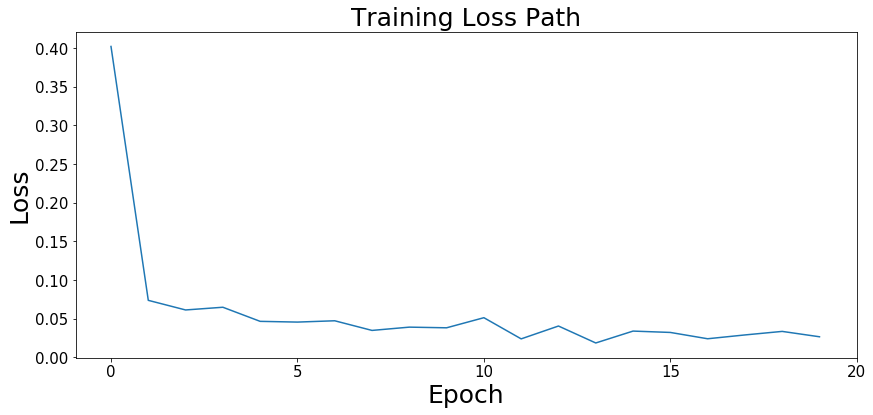

In [11]:
plot_loss(losspath_SGD)

In [12]:
errors(test_net_SGD, train_input, test_input, train_target, test_target)

Final training error: 5.2%
Final test error: 6.4%
Final training set loss: 0.0349
Final test set loss: 0.0449


In [13]:
# showcase parameter return function (returns dict of dicts)
test_net_SGD.param()

{'layer0': {'bias': tensor([[-0.6382, -0.5998, -0.1937, -0.2852, -0.2882,  0.0954, -0.1996, -0.7788,
           -0.1044, -0.0053, -0.2774, -0.5165, -0.5480, -0.4323, -0.6008, -0.5595,
           -0.3529, -0.2902, -0.1943, -0.2049, -0.4183, -0.3905, -0.4826, -0.2080,
           -0.4147]]),
  'weights': tensor([[-8.3180e-01, -8.4997e-01,  3.2026e-01,  3.9548e-01, -3.5743e-01,
           -2.6295e-02, -4.6403e-01, -5.5811e-01, -2.4651e-01,  1.7493e-01,
            1.3586e-01,  5.1428e-01, -3.9095e-01, -9.3398e-01,  1.0376e+00,
            1.0187e+00,  4.5049e-01, -2.3200e-01, -2.3664e-01,  2.7083e-01,
            3.5224e-01, -3.2348e-02, -6.1499e-01, -3.0046e-01,  5.3515e-01],
          [ 5.6846e-01, -5.9894e-01,  2.4759e-01, -5.1862e-01,  4.0211e-01,
           -2.6301e-02,  2.5258e-04,  1.2223e+00,  1.5840e-01, -1.6152e-01,
           -3.2530e-01,  8.7187e-01, -7.3794e-01, -4.3040e-02,  5.4468e-01,
           -2.6093e-01, -6.4349e-01, -4.4394e-01, -1.7630e-01, -4.7091e-01,
            6.

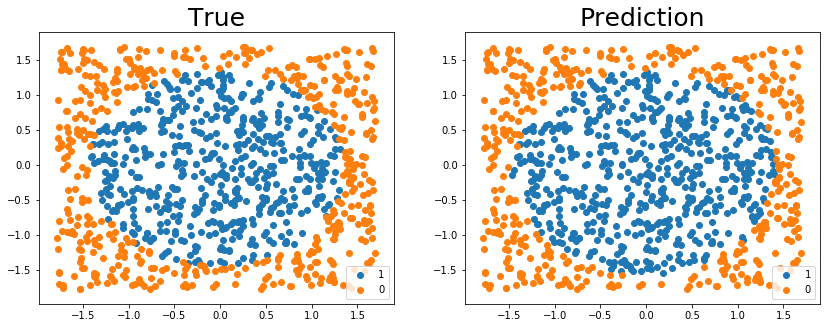

In [14]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_SGD.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

# Optimizer 2: batch SGD

### Batchsize = 5

In [15]:
# initialise the test network
test_net_batchSGD5 = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.batchSGD(test_net_batchSGD5, lossf, 5)
# train the model
losspath_batchSGD5 = optim.train(train_input, train_target, 20, 1e-2)

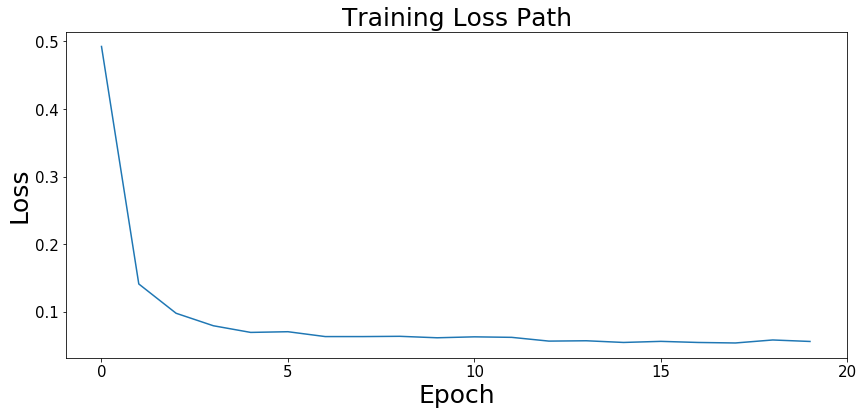

In [16]:
plot_loss(losspath_batchSGD5)

In [17]:
errors(test_net_batchSGD5, train_input, test_input, train_target, test_target)

Final training error: 3.9%
Final test error: 5.3%
Final training set loss: 0.0533
Final test set loss: 0.0632


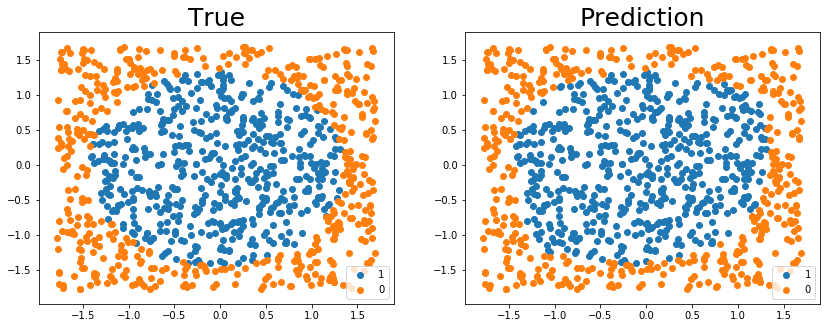

In [18]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_batchSGD5.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

### Batch size 10

In [19]:
# initialise the test network
test_net_batchSGD10 = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.batchSGD(test_net_batchSGD10, lossf, 5)
# train the model
losspath_batchSGD10 = optim.train(train_input, train_target, 20, 1e-2)

### Batch size 20

In [20]:
# initialise the test network
test_net_batchSGD20 = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.batchSGD(test_net_batchSGD20, lossf, 5)
# train the model
losspath_batchSGD20 = optim.train(train_input, train_target, 20, 1e-2)

# Optimizer 3: AdaGrad

In [21]:
# initialise the test network
test_net_ada = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.AdaGrad(test_net_ada, lossf, batchsize=10)
# train the model
losspath_ada = optim.train(train_input, train_target, 20, False)

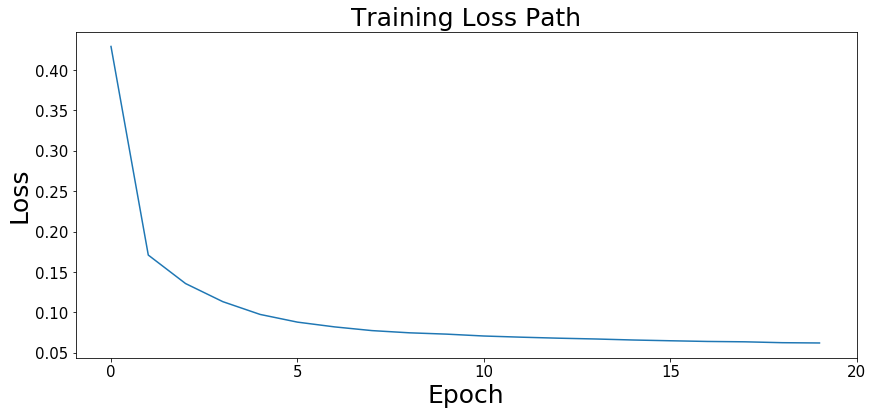

In [22]:
plot_loss(losspath_ada)

In [23]:
errors(test_net_ada, train_input, test_input, train_target, test_target)

Final training error: 1.2%
Final test error: 3.0%
Final training set loss: 0.0613
Final test set loss: 0.0666


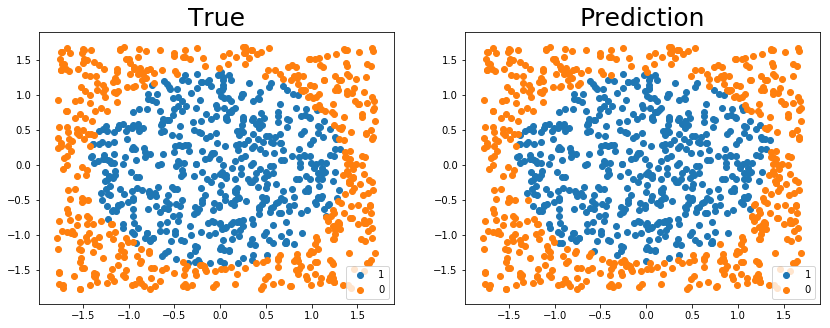

In [24]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_ada.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

# Optimizer 4: RMSProp

In [25]:
# initialise the test network
test_net_rmsp = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.RMSProp(test_net_rmsp, lossf, batchsize=10)
# train the model
losspath_rmsp = optim.train(train_input, train_target, 20, False)

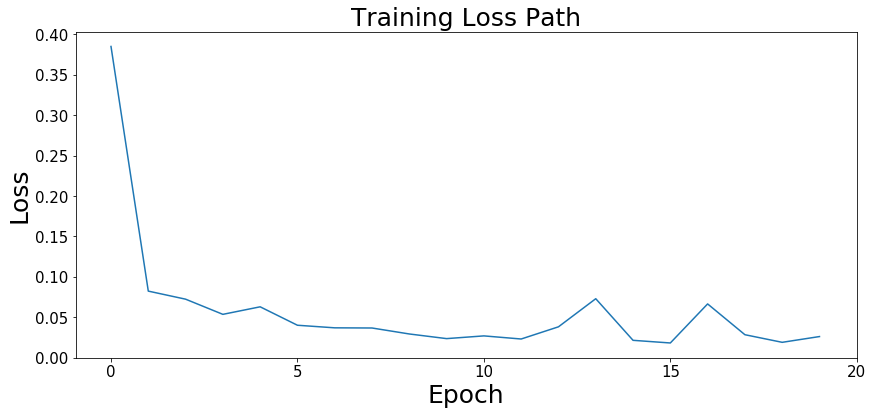

In [26]:
plot_loss(losspath_rmsp)

In [27]:
errors(test_net_rmsp, train_input, test_input, train_target, test_target)

Final training error: 2.7%
Final test error: 4.5%
Final training set loss: 0.0206
Final test set loss: 0.0297


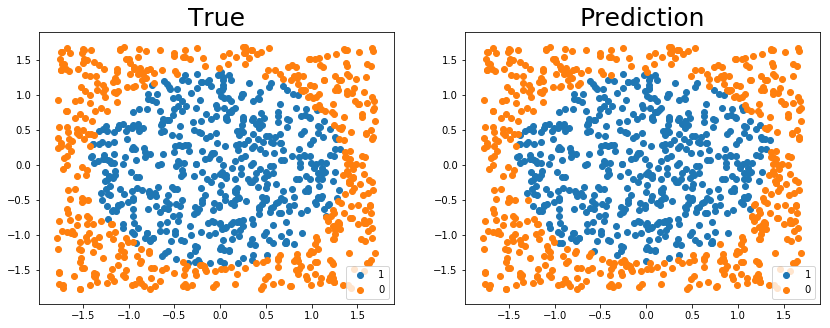

In [28]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_ada.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

# Optimizer 5: Adam

In [29]:
# initialise the test network
test_net_adam = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.MSE()
optim = n.optimizers.Adam(test_net_adam, lossf, batchsize=10)
# train the model
losspath_adam = optim.train(train_input, train_target, 20, False)

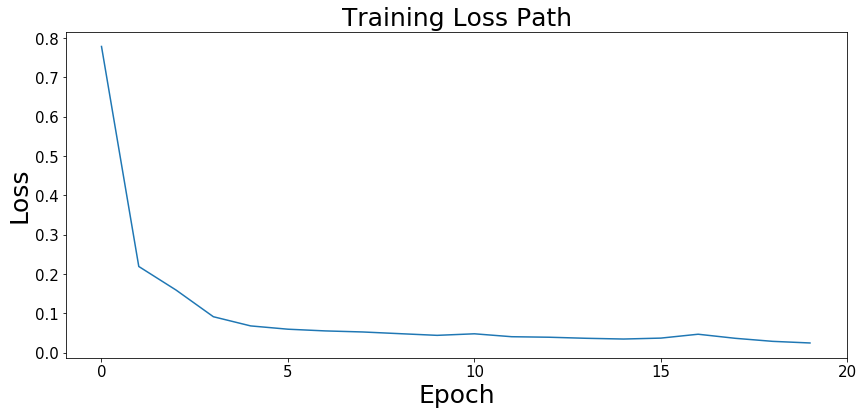

In [30]:
plot_loss(losspath_adam)

In [31]:
errors(test_net_adam, train_input, test_input, train_target, test_target)

Final training error: 1.5%
Final test error: 3.0%
Final training set loss: 0.0237
Final test set loss: 0.0301


# Plot of different Losspaths

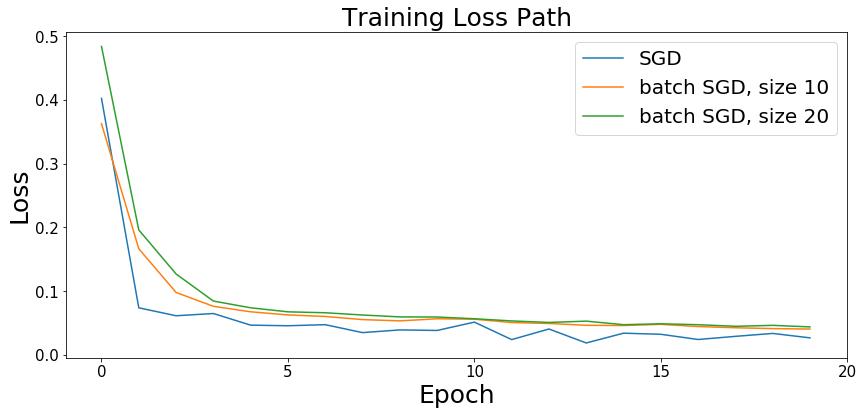

In [32]:
compare_loss2(losspath_SGD, losspath_batchSGD10, losspath_batchSGD20)

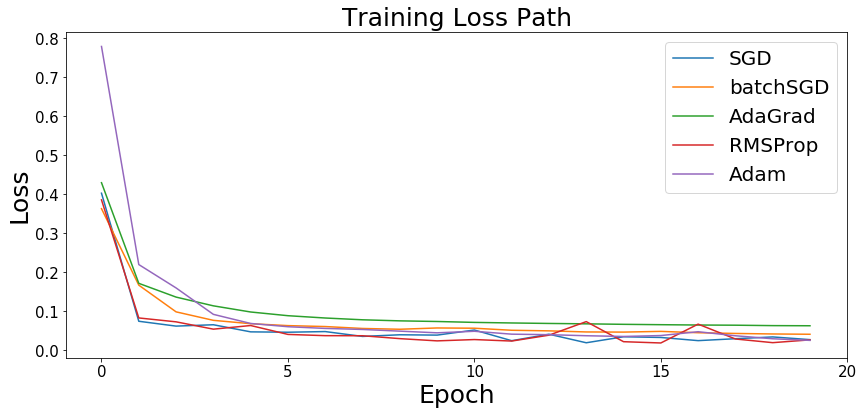

In [33]:
compare_loss(losspath_SGD, losspath_batchSGD10, losspath_ada, losspath_rmsp, losspath_adam)

# Cross-entropy loss

In [34]:
# initialise the test network
test_net_SGD_CE = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.CE()
optim = n.optimizers.SGD(test_net_SGD_CE, lossf)
# train the model
losspath_SGD_CE = optim.train(train_input, train_target, 20, 1e-2)

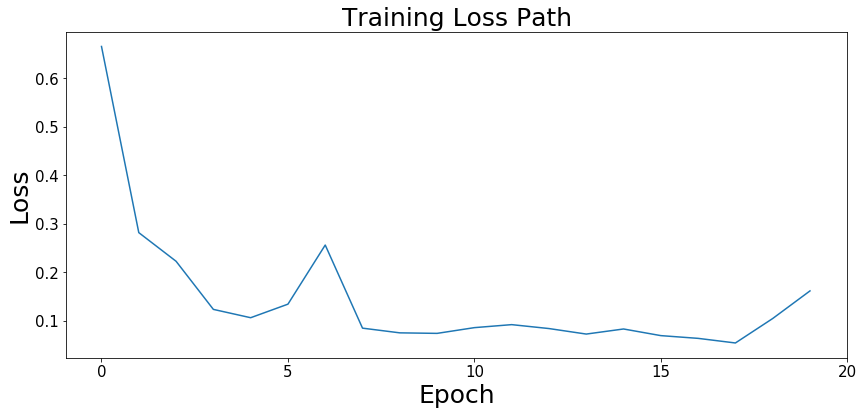

In [35]:
plot_loss(losspath_SGD_CE)

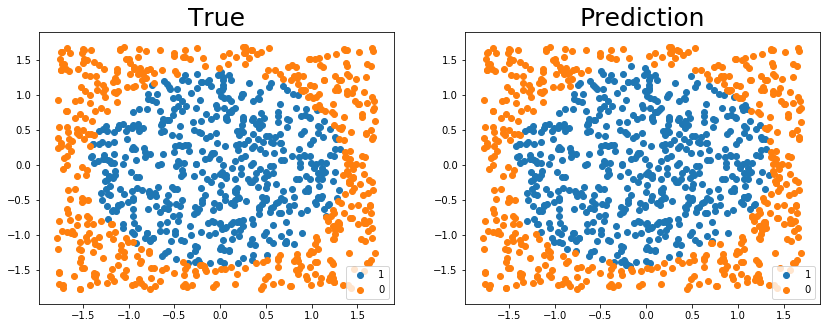

In [36]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_SGD_CE.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

In [37]:
errors(test_net_SGD_CE, train_input, test_input, train_target, test_target)

Final training error: 2.5%
Final test error: 3.5%
Final training set loss: 0.0643
Final test set loss: 0.0775


# Cross-entropy loss with batch-SGD

In [41]:
# initialise the test network
test_net_bSGD_CE = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.CE()
optim = n.optimizers.batchSGD(test_net_bSGD_CE, lossf, 10)
# train the model
losspath_bSGD_CE = optim.train(train_input, train_target, 50, 1e-2)

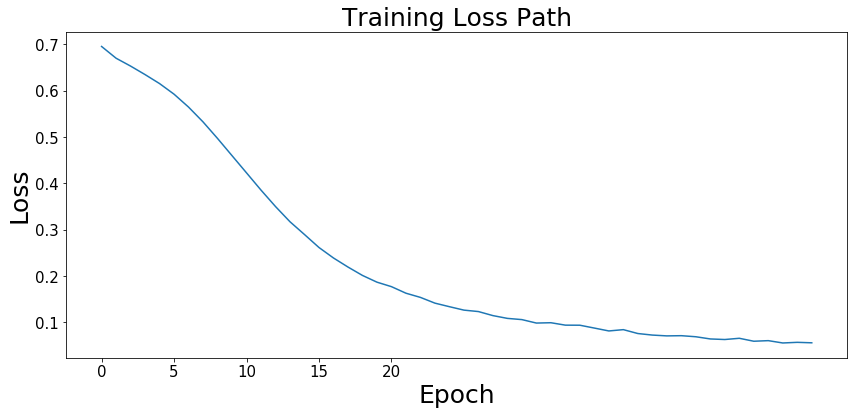

In [42]:
plot_loss(losspath_bSGD_CE)

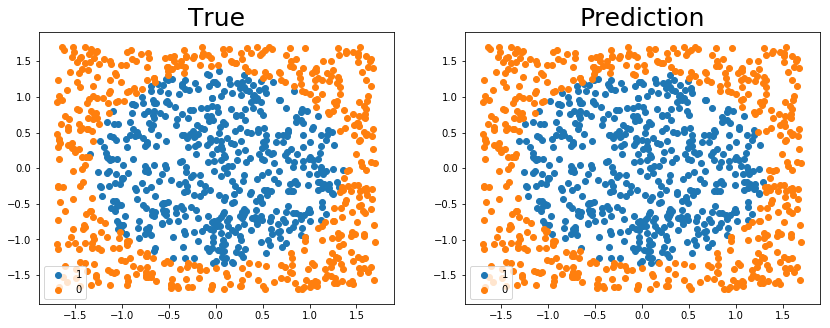

In [43]:
# plot the test set performance
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_bSGD_CE.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

In [44]:
errors(test_net_bSGD_CE, train_input, test_input, train_target, test_target)

Final training error: 0.7%
Final test error: 1.9%
Final training set loss: 0.0526
Final test set loss: 0.0636


# Cross-entropy loss with dropout layers

In [38]:
# initialise the test network
test_net_SGD_CE_DO = n.networks.sequential([
    n.layers.fully_connected(2,25),
    n.activations.relu(),
    n.layers.dropout(0.3),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.dropout(0.3),
    n.layers.fully_connected(25,25),
    n.activations.relu(),
    n.layers.dropout(0.3),
    n.layers.fully_connected(25,2)
])
# define loss and optimizer
lossf = n.loss.CE()
optim = n.optimizers.SGD(test_net_SGD_CE_DO, lossf)
# train the model
losspath_SGD_CE_DO = optim.train(train_input, train_target, 20, 1e-2)

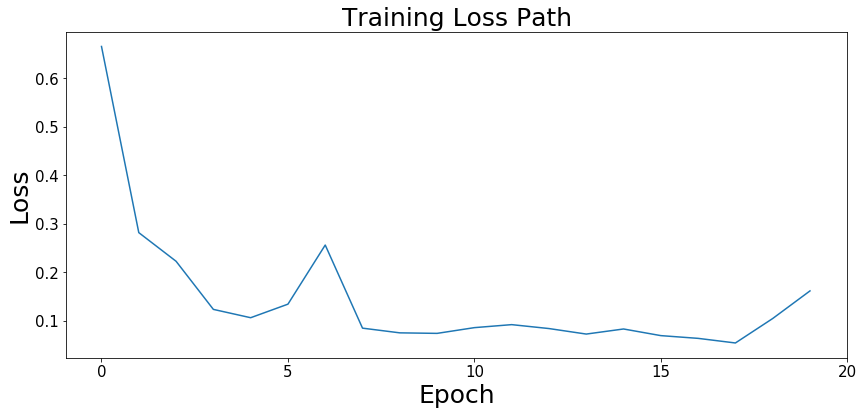

In [39]:
plot_loss(losspath_SGD_CE)

Switching training mode to False for all layers...


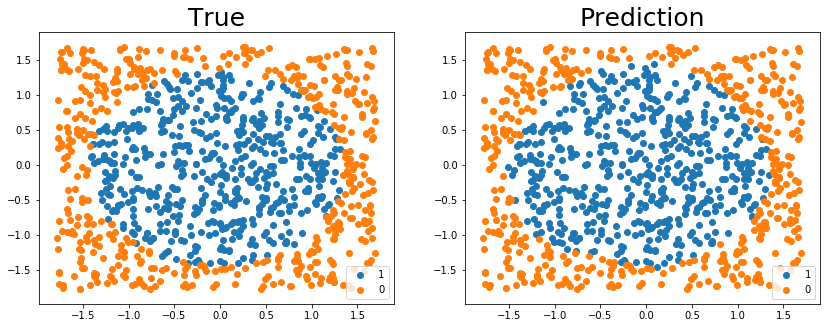

In [42]:
# plot the test set performance
test_net_SGD_CE_DO.set_training_mode(False)
f, (ax1, ax2) = plt.subplots(1,2, figsize= (14,5))
plot_result(test_input, torch.argmax(test_target, dim = 1), title= 'True', ax = ax1)
plot_result(test_input, torch.argmax(test_net_SGD_CE_DO.forward(test_input), dim = 1), title= 'Prediction', ax = ax2)

In [43]:
errors(test_net_SGD_CE_DO, train_input, test_input, train_target, test_target)

Final training error: 3.2%
Final test error: 3.4%
Final training set loss: 0.1221
Final test set loss: 0.1235
